<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/06-28/litao3_gating_graphite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [ ]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 689, done.
remote: Counting objects: 100% (492/492), done.
remote: Compressing objects: 100% (344/344), done.
remote: Total 689 (delta 270), reused 281 (delta 145), pack-reused 197
Receiving objects: 100% (689/689), 28.70 MiB | 6.76 MiB/s, done.
Resolving deltas: 100% (346/346), done.


'/content'

In [ ]:
%cd "/content/gator/data/06-28/"

/content/gator/data/06-28


In [ ]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

### Gating LiTAO3 with a graphite gate electrode

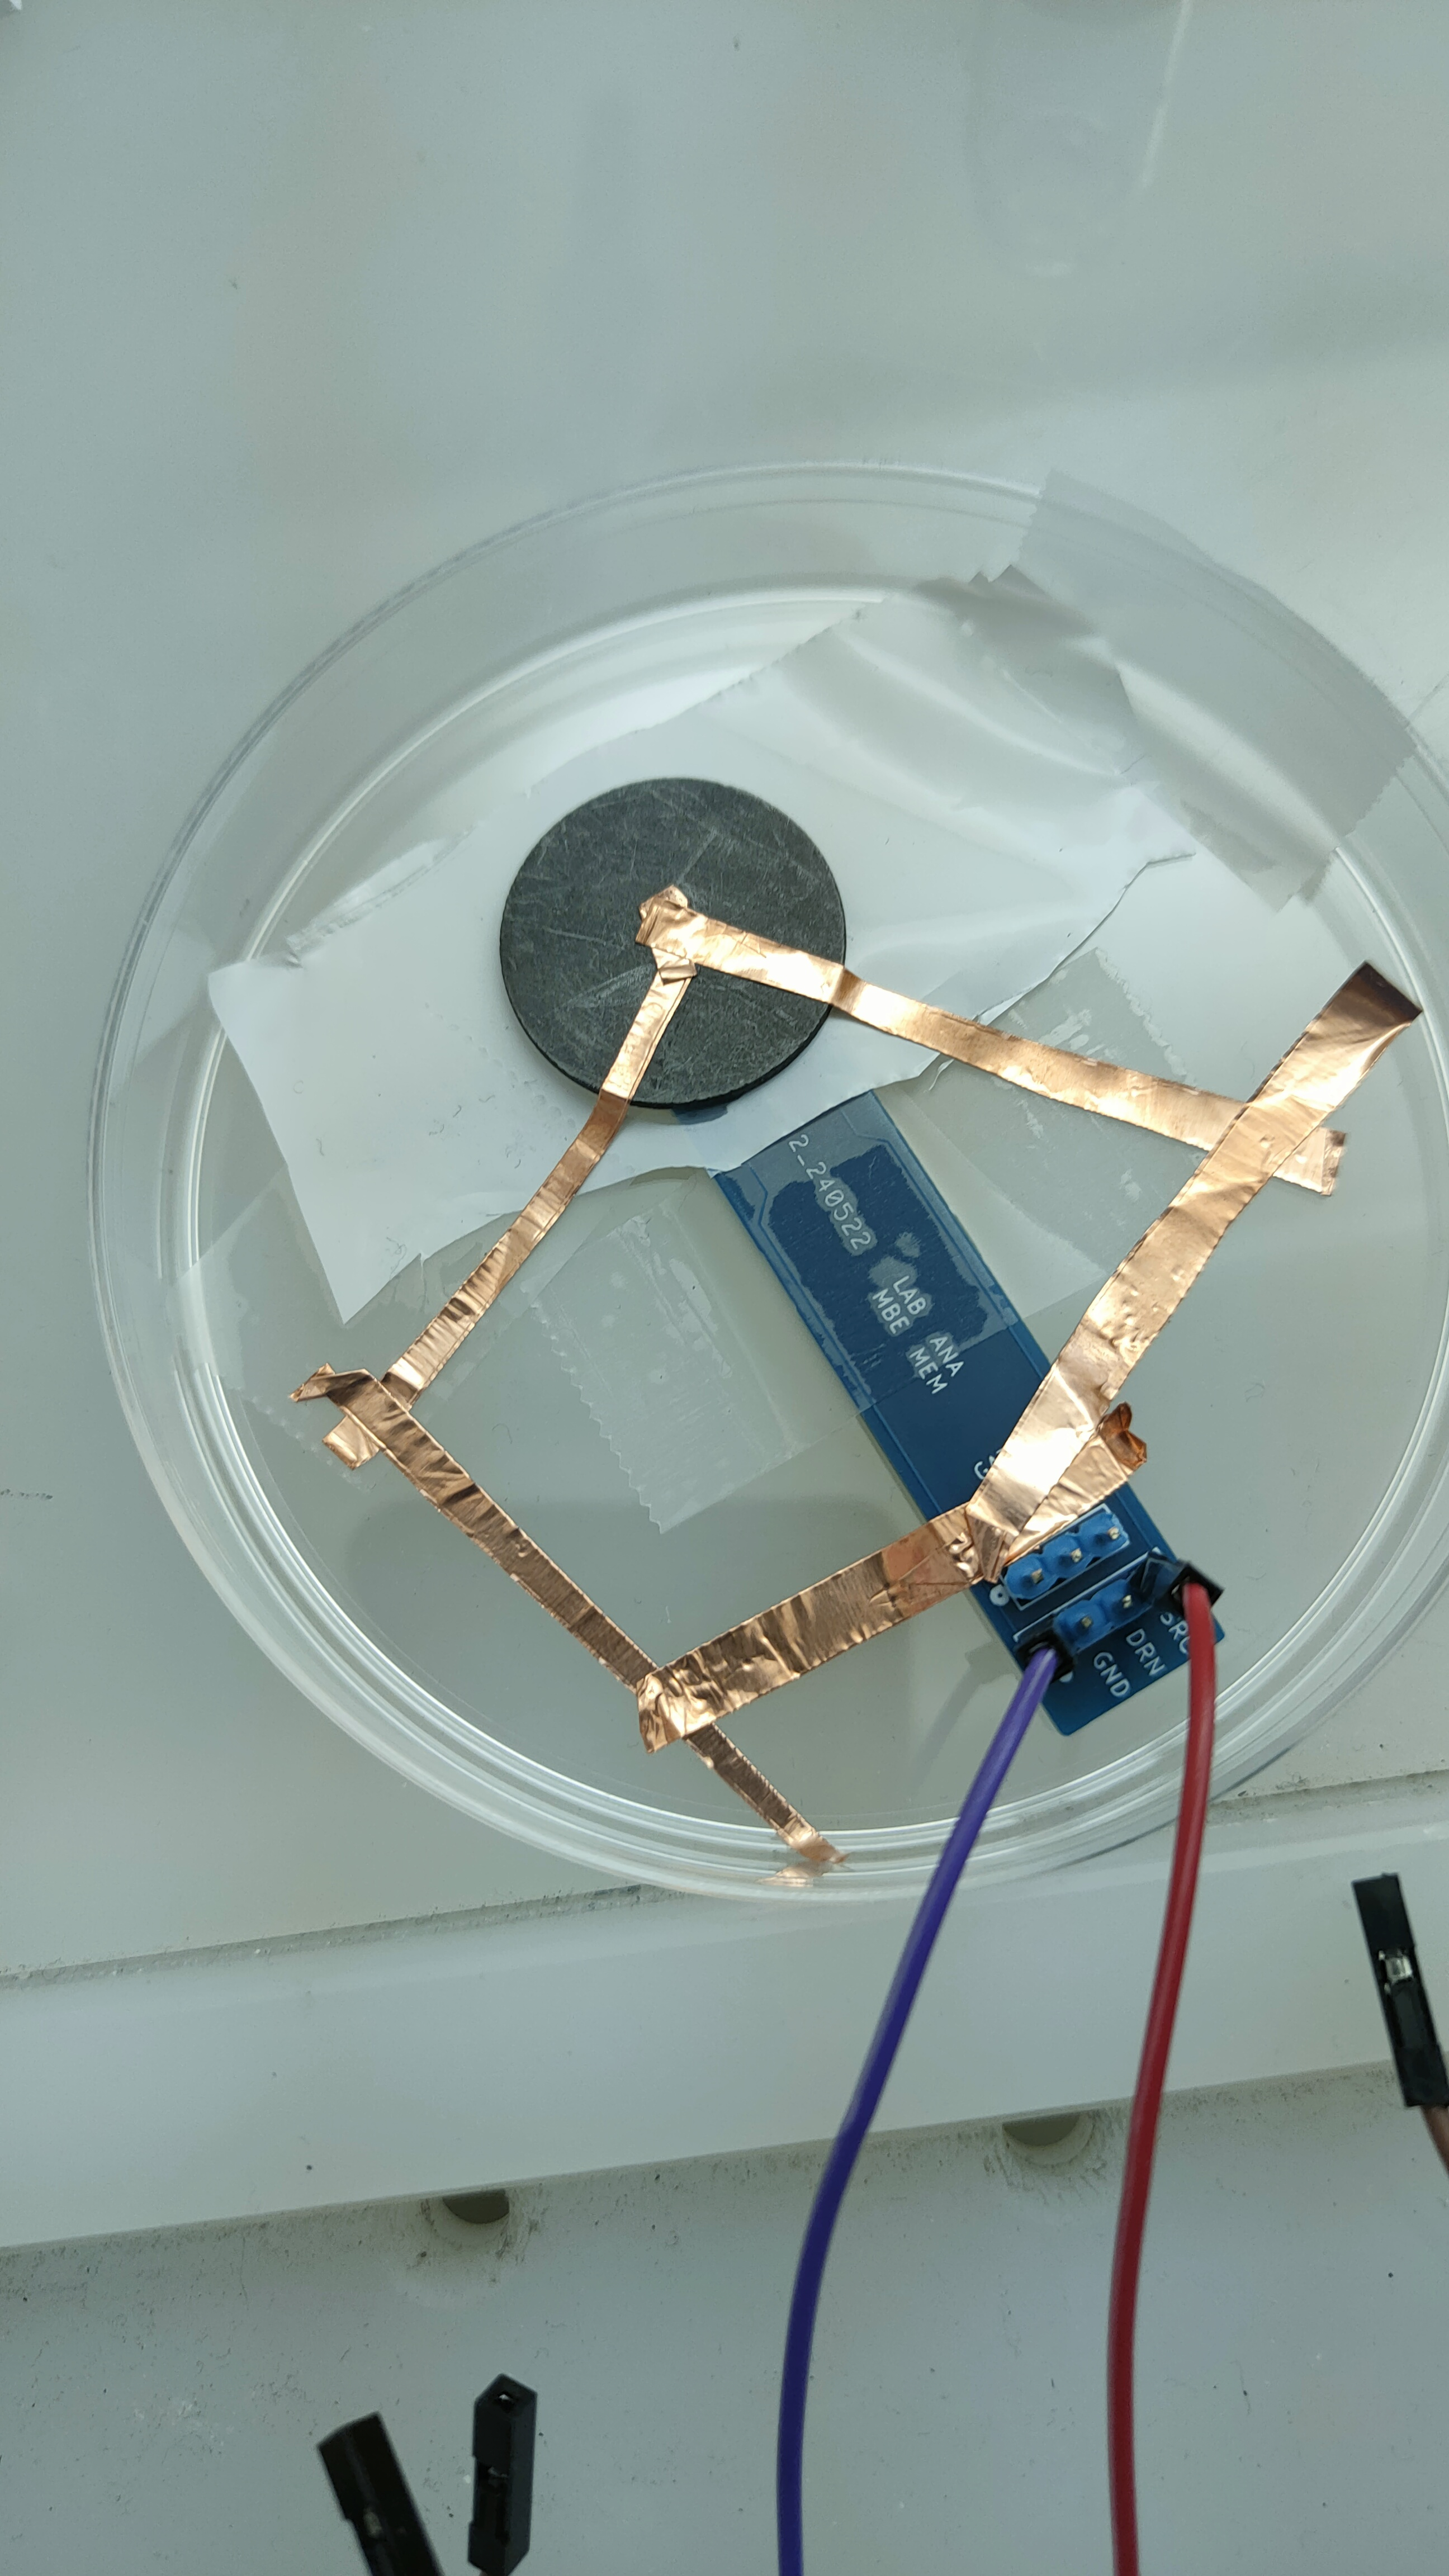

In [ ]:
prep_csv('defbuffer1_0628_122358.csv')
df = pd.read_csv('defbuffer1_0628_122358.csv')


Fill Mode,1



In [ ]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,2.090914e-10,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.992517,Volt DC,1,T,2W,F,F,0.000000
1,2.195445e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999990,Volt DC,1,T,2W,F,F,0.649491
2,2.062512e-10,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.992280,Volt DC,1,T,2W,F,F,0.941263
3,2.065417e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999986,Volt DC,1,T,2W,F,F,1.590779
4,2.111450e-10,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.992365,Volt DC,1,T,2W,F,F,1.882502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9631,-1.112747e-12,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.000015,Volt DC,1,F,2W,F,F,3380.541989
9632,-4.448859e-11,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.007513,Volt DC,1,F,2W,F,F,3381.481941
9633,-4.376548e-11,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.007909,Volt DC,1,F,2W,F,F,3382.353752
9634,-3.014709e-11,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.000015,Volt DC,1,F,2W,F,F,3383.002663


In [ ]:
# Time (s)
T = df['Relative Time']

# Current (mA)
I = df['Reading']*1e9

# Potential (mV)
V = df['Value']

Text(0.5, 0, 'Time (s)')

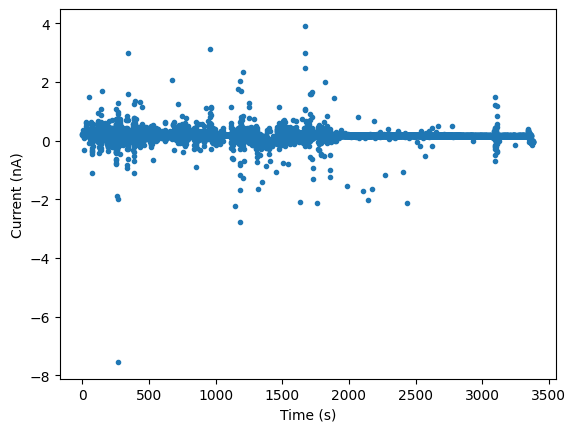

In [ ]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

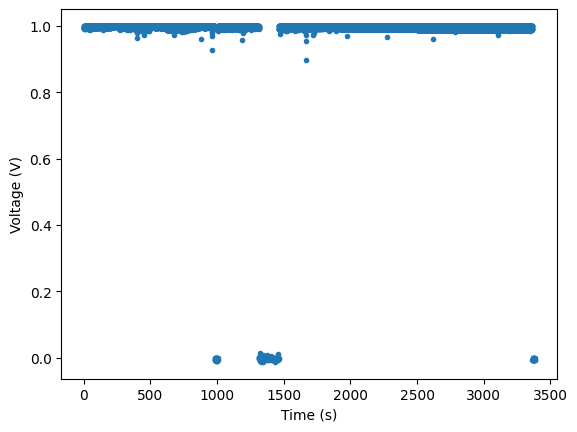

In [ ]:
cut1 = 0
cut2 = -1
V_numeric = np.array(V, dtype=float)

mask = V_numeric < 1
T=T[mask]
V=V_numeric[mask]
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

Not a satisfying result, even though we could verify that the gating was effective, we could not see a response from our sample in terms of current

### IV on our sample, after gating with graphite electrode
Applying an increasing voltage and seeing how the current evolves

In [ ]:
prep_csv('defbuffer1_0628_140135.csv')
df2 = pd.read_csv('defbuffer1_0628_140135.csv')

Fill Mode,1



In [ ]:
df2

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-3.293532e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.000035,Volt DC,10,T,2W,F,F,0.000000
1,4.903815e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.050499,Volt DC,10,T,2W,F,F,0.942936
2,1.190518e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.101119,Volt DC,10,T,2W,F,F,1.424442
3,1.692127e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.151330,Volt DC,10,T,2W,F,F,1.905970
4,2.200581e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.201891,Volt DC,10,T,2W,F,F,2.387471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,1.836321e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.201855,Volt DC,10,T,2W,F,F,152.083176
593,1.330083e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.151280,Volt DC,10,T,2W,F,F,152.564701
594,4.648390e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.069299,Volt DC,10,T,2W,F,F,153.168548
595,2.038860e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.032294,Volt DC,10,T,2W,F,F,153.650085


In [ ]:
# Time (s)
T = df2['Relative Time']

# Current (mA)
I = df2['Reading']*1e9

# Potential (V)
V = df2['Value']

Text(0.5, 0, 'Voltage (V)')

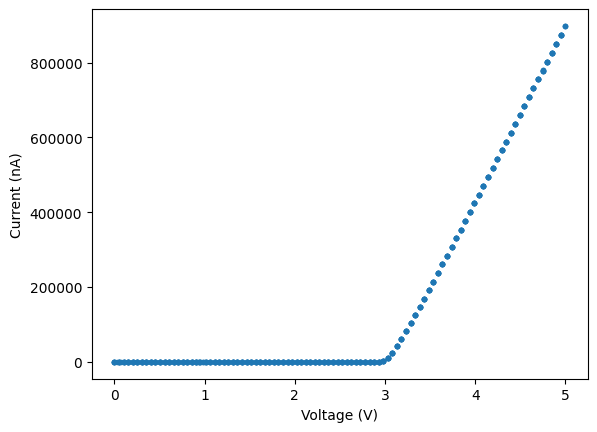

In [ ]:

cut1 = 0
cut2 = -1
plt.plot(V[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Voltage (V)')

Text(0.5, 0, 'Time (s)')

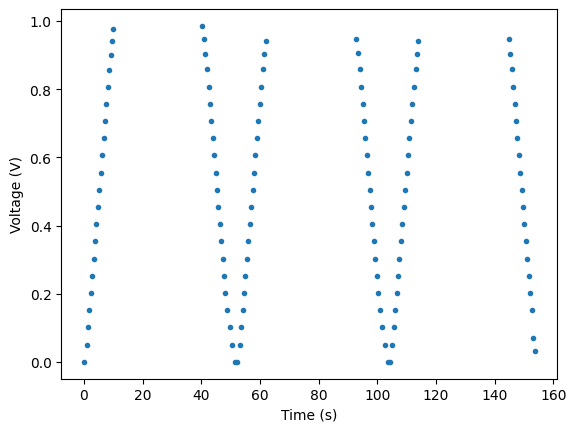

In [ ]:
cut1 = 0
cut2 = -1
V_numeric = np.array(V, dtype=float)

mask = V_numeric < 1
T=T[mask]
V=V_numeric[mask]
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

### Measuring the current between gate and drain

In [ ]:
prep_csv('defbuffer1_0628_140527.csv')
df3 = pd.read_csv('defbuffer1_0628_140527.csv')

Fill Mode,1



In [ ]:
df3

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-0.000924,Amp DC,0.001,5.5,F,F,F,F,F,F,...,F,Main,-4.999755,Volt DC,10,T,2W,F,F,0.000000
1,-0.000876,Amp DC,0.001,5.5,F,F,F,F,F,F,...,F,Main,-4.898586,Volt DC,10,T,2W,F,F,0.069487
2,-0.000829,Amp DC,0.001,5.5,F,F,F,F,F,F,...,F,Main,-4.797800,Volt DC,10,T,2W,F,F,0.138938
3,-0.000781,Amp DC,0.001,5.5,F,F,F,F,F,F,...,F,Main,-4.696683,Volt DC,10,T,2W,F,F,0.208382
4,-0.000734,Amp DC,0.001,5.5,F,F,F,F,F,F,...,F,Main,-4.595839,Volt DC,10,T,2W,F,F,0.277817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,-0.000734,Amp DC,0.001,5.5,F,F,F,F,F,F,...,F,Main,-4.595847,Volt DC,10,T,2W,F,F,98.491821
593,-0.000781,Amp DC,0.001,5.5,F,F,F,F,F,F,...,F,Main,-4.696681,Volt DC,10,T,2W,F,F,98.561256
594,-0.000829,Amp DC,0.001,5.5,F,F,F,F,F,F,...,F,Main,-4.797800,Volt DC,10,T,2W,F,F,98.630685
595,-0.000876,Amp DC,0.001,5.5,F,F,F,F,F,F,...,F,Main,-4.898608,Volt DC,10,T,2W,F,F,98.700116


In [ ]:
# Time (s)
T = df3['Relative Time']

# Current (mA)
I = df3['Reading']

# Potential (mV)
V = df3['Value']

Text(0.5, 0, 'Voltage (V)')

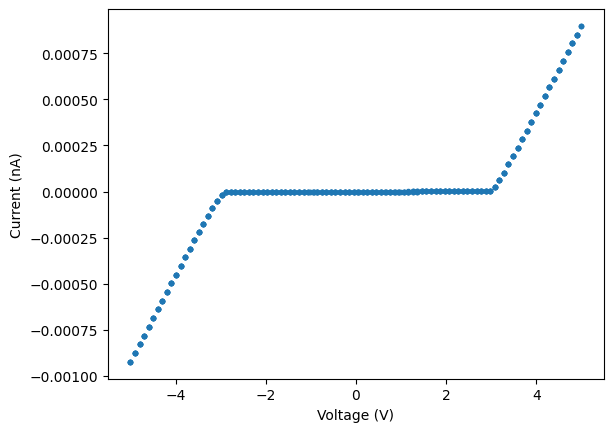

In [ ]:


cut1 = 0
cut2 = -1
plt.plot(V[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Voltage (V)')

The current is negative when the voltage is negative and vice-versa
Our sample can be described as a resistor, seeing the straight curve

Text(0.5, 0, 'Time (s)')

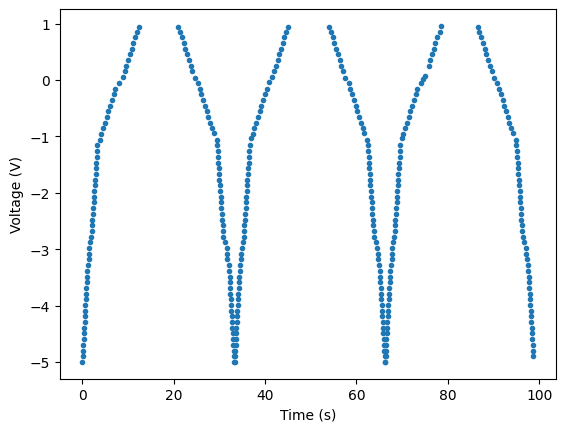

In [ ]:
cut1 = 0
cut2 = -1
V_numeric = np.array(V, dtype=float)

mask = V_numeric < 1
T=T[mask]
V=V_numeric[mask]
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')